## Project: Investigate a Dataset

Project rubric:
https://review.udacity.com/#!/rubrics/107/view

Submission:
What to include in your submission
1. A PDF or HTML file containing your analysis. This file should include:
1. A note specifying which dataset you analyzed
1. A statement of the question(s) you posed
1. A description of what you did to investigate those questions
1. Documentation of any data wrangling you did
1. Summary statistics and plots communicating your final results
1. Code you used to perform your analysis. If you used an Jupyter notebook, you can submit your .ipynb. Otherwise, you 1. should submit the code separately in .py file(s).
1. A list of Web sites, books, forums, blog posts, github repositories, etc. that you referred to or used in creating your submission (add N/A if you did not use any such resources).

Data dictionary:
https://www.kaggle.com/c/titanic/data

### Introduction
I've chosen the titanic dataset to work in this project and using the additional facts found on the internet [I've captured some of them below], I used this sample dataset to compare the survival rate against different grouping of the passengers. The goal would be to identify which passenger group have the highest chance to survive.
Based on what I've read in a wiki article, I've divided the groups into men, women and child (age < 18) and also by the ticket class since this grouping makes logical sense to me.

##### Interesting facts:
1. Titanic Passengers. 3,547 - the maximum capacity of the RMS Titanic when fully loaded with passengers and crew. 2,222 - the total number of people on board (passengers and crew).
1. The Titanic originally was designed to carry 64 lifeboats. To save from cluttering decks, the ship ended up carrying 20 on her maiden voyage. 9. Only 706 passengers and crew would survive the disaster.
1. The ship could have stayed afloat had only four compartments flooded... Five became flooded. 1,503 people total died, including passengers and crew. One of the first lifeboats to leave the Titanic carried only 28 people; it could have held 64 people.
1. The number of casualties of the sinking is unclear, due to a number of factors. These include confusion over the passenger list, which included some names of people who cancelled their trip at the last minute, and the fact that several passengers travelled under aliases for various reasons and were therefore double-counted on the casualty lists.[207] The death toll has been put at between 1,490 and 1,635 people
1. The last living survivor, Millvina Dean from England, who at only nine weeks old was the youngest passenger on board, died aged 97 on 31 May 2009

##### Sources
1. www.titanicfacts.net/titanic-passengers.html
1. http://archive.jsonline.com/entertainment/100-unsinkable-facts-about-the-titanic-2t4psu6-147436195.html
1. https://en.wikipedia.org/wiki/RMS_Titanic

##### Technical References
1. https://eazybi.com/blog/data_visualization_and_chart_types/
1. https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe
1. https://stackoverflow.com/questions/42784930/how-to-plot-a-dataframe-grouped-by-two-columns-in-matplotlib-and-pandas
1. https://www.w3schools.com/colors/colors_picker.asp
1. https://stackoverflow.com/questions/11244514/modify-tick-label-text


### Questions
1. Which group has the highest survival rate?
1. Which group in the Ticket class have the highest survival rate?
1. Which group amongst men, women and children (age <= 18) have the highest survival rate?

In [10]:
import pandas as pd

# pointing to the data file folder
import os.path
mypath = '/home/nbuser/'
os.chdir(mypath)

# checking the file layout
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)
print 'sample size:', len(titanic_df)
titanic_df.head()


sample size: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling
1. To create the additional column for children (age < 18), I first need to first clean up any none integer values.
1. As there are many passengers that didn't have a proper age value, I had to assume by replacing them with the mean age of the dataset.
1. Before replacing the NaN value, let's start by checking how big of a portion are such that data so that I know how much data that I'm affecting.


In [11]:
# Age data in the set consists of NaN
empty_values = len(titanic_df[titanic_df['Age'].isnull()])

# check for percentages of modified data
print float(empty_values) / float(len(titanic_df)) * 100

# get the average age for the data set
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# check again to ensure no more NaN value for age
titanic_df[titanic_df['Age'].isnull()]

# adding IsAdult flag column
titanic_df['IsAdult'] = titanic_df['Age'] > 18

titanic_df.head()


19.8653198653


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


### Note
1. So a big portion, 19.86%, of the data was modified for the above assumption. This unfortunately will skew most of the data for the age analysis later.

### Start by getting the descriptive stats for the groups for initial comparison
1. So I am going to start by exploring the stats for the different group to see if there's any clear pattern at this stage.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set(color_codes=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
def autolabel(ax, values):
    rects = ax.patches
    # Now make some labels
    labels = ["%d" % i for i in (values)]

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height*1.01, label, ha='center', va='bottom')
        
def rename_xticks(ax, title):
    # Overwrite the xticks value for survival
    if title=='Survival':
        labels = ['','Perished','', 'Survived']
        ax.set_xticklabels(labels)
    elif title=='Survived':
        labels = ['Perished','Survived']
        ax.set_xticklabels(labels)
    elif title=='Ticket Class':
        labels = ['','First','', 'Second', '', 'Third']
        ax.set_xticklabels(labels)
    elif title=='Pclass':
        labels = ['First','Second', 'Third']
        ax.set_xticklabels(labels)
        
def plothist(title, fig, position, df, color, bins=8):
    ax = fig.add_subplot(2, 3, position)
    ax.set_title(title + ' of Passengers', y=1.08)
    ax.set(xlabel=title, ylabel="Count")
    
    values = ax.hist(df, color=color, bins=bins);
    autolabel(ax, values[0])
    
    rename_xticks(ax, title)

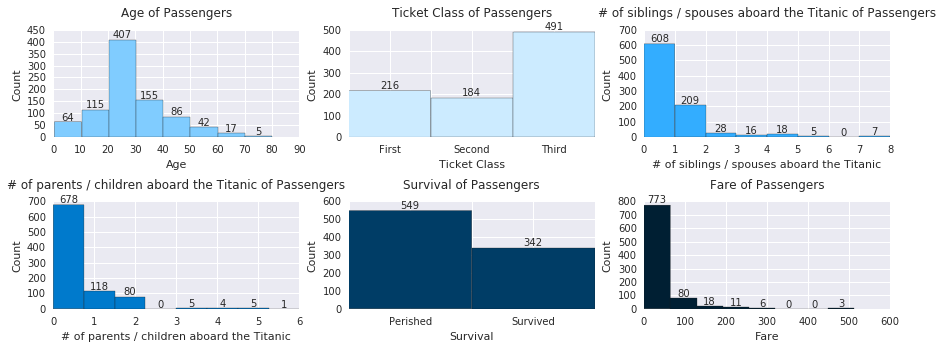

In [14]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=.6)

plothist('Age', fig, 1, titanic_df['Age'], '#80ccff')
plothist('Ticket Class', fig, 2, titanic_df['Pclass'], '#ccebff', bins=[1,2,3,4])
plothist('# of siblings / spouses aboard the Titanic', fig, 3, titanic_df['SibSp'], '#33adff')
plothist('# of parents / children aboard the Titanic', fig, 4, titanic_df['Parch'], '#007acc')
plothist('Survival', fig, 5, titanic_df['Survived'], '#003d66', bins=[0,1,2])
plothist('Fare', fig, 6, titanic_df['Fare'], '#001f33')


In [15]:
survival_pct = 549/891. * 100
print round(survival_pct,2),'%'

61.62 %


### Data Overview
Let's begin by analysing the data across a few of the categories. I've looked at all the categories which includes numerical values to start the analysis.

1. In terms of age, majority of the passengers, 407, are within the 20 to 30 age range.
1. From ticket class perspective, the majority of passengers are in the third class, 491 person.
1. Looking at no of siblings or spouses aboard, the majority have 0 siblings or spouse onboard, 608 person. 
    1. There appears to be 7 people with 7 siblings or spouses onboard, and it would have been rather unfortunate if it was indeed the case that the 7 person onboard were actually family.
1. This coincide with the data that shows number of parents or children abord, which are around 678 person.
1. Unfortunately, the majority of the passengers didn't survive the trip with a death rate of 549.
    1. That is 61.62 % of all the sample passengers onboard.
1. It would appears that the ticket class doesn't match exactly with the fare paid as majority of passengers, 773, paid up to 50 pounds for the ticket but there are only 491 passengers in the third class ticket. 
    1. Three passengers appear to have paid 500 pounds to be board this ship.


### Limitation
Before proceeding further, let's look at some limitation and assumptions that we have with the current data.

1. We don't know how the sample was selected from the original population, hence there could already be some bias in the data. So the assumption here is that the sample data set should be random enough so that our analysis can still be carried out.
1. We don't have all the correct values for age in this data set, in fact 19.86% of it, hence we try to fill up the empty values using the mean to avoid skewing the data too much to the left or to the right.
    1. We could have probably done the same using the median value instead of the mean. But the mean was chosen for this analysis.
    1. Another possible value would be to replace it with 0, however that would have skewed the data towards the left which could impact the analysis for IsAdult later on.
    1. We could have also dropped the data with non integer age value, but as I'm interested to see how the other factors could impact my analysis, I've decided to keep these data.
1. Certain values are mixed into one category such as number of siblings and number of spouses, thus we wouldn't be able to make accurate assumptions about the data unless we're able to differentiate them clearly.
1. The same goes for the category of number of parents or children aboard, we wouldn't able to tell which is which correctly either.
1. Also, in the interest of time, I've decided to focus on a smaller subsets of factors and did not analyse through each possible combinations.

Let's continue by looking at multiple variables comparison.
We are interested to see which category correlates closer to the survival rate.

In [16]:
def rename_yticks(ax, title):
    if title=='Pclass':
        labels = ['','First','','Second','', 'Third']
        ax.set_yticklabels(labels)
    elif title=='Age':
        labels = ['','0','20','40','60','80', '100']
        ax.set_yticklabels(labels)
    elif title=='SibSp':
        labels = ['','0','2','4','6','8', '10']
        ax.set_yticklabels(labels)
    elif title=='Parch':
        labels = ['','0','1','2','3','4', '5','6','7']
        ax.set_yticklabels(labels)
    elif title=='Fare':
        labels = ['','0','100','200','300','400', '500', '600']
        ax.set_yticklabels(labels)
    elif title=='Survived':
        labels = ['','Perished','','','', '', 'Survived']
        ax.set_yticklabels(labels)

def plot_violin(df, x, y):
    f, ax = plt.subplots(figsize=(8, 8))

    # Show each distribution with both violins and points
    sns.violinplot(x=x, y=y, data=df, inner="box", palette="Set3", cut=0, linewidth=3)

    sns.despine(left=True)

    title = x + ' by ' + y
    f.suptitle(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(x,size = 16,alpha=0.7)
    ax.set_ylabel(y,size = 16,alpha=0.7);
    #ax.set_ylim(0)
    
    rename_xticks(ax, x)
    rename_yticks(ax, y)

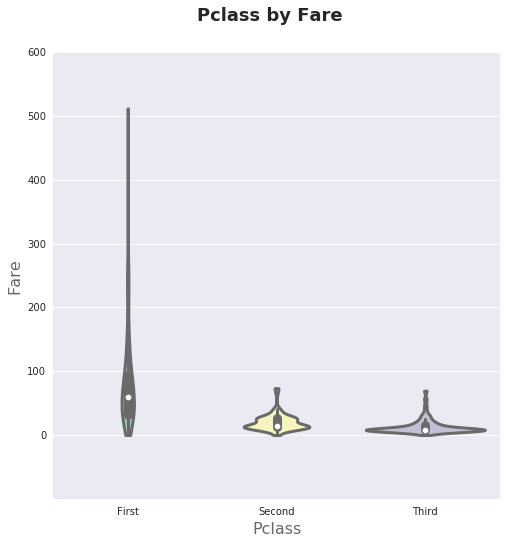

In [17]:
plot_violin(titanic_df,'Pclass','Fare')


### Ticket Class by Fare
1. Fares for the first class passengers has the highest range with fares median around fifty dollars and it goes all the way up to slightly over five hundred dollars.
1. Majority of the passengers in second and third class paid less than fifty dollars for the fare.
    1. This explains why the majority of the passengers paid less than fifty. So probably the second class ticket holders bought the tickets via early bird scheme or was heavily discounted for some reason, such as children fare or senior citizen.
    1. The remaining passengers that paid less than fifty dollars must have came from the first class passengers.


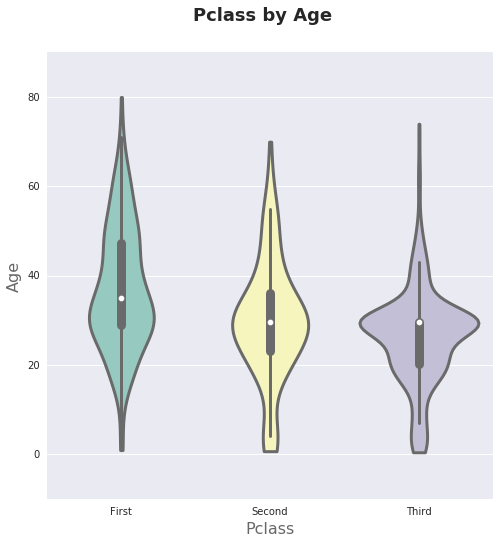

In [9]:
plot_violin(titanic_df,'Pclass','Age')


### Ticket class by Age
1. Not suprisingly, each ticket class has the highest concentration of passengers on the age range of 30.
1. And indeed, third class passengers has the highest number of passengers in that age group.
1. And we do indeed see higher distribution of age 10 and below for second class passengers and higher percentage of passengers over the age of 55 in both the first and second class. This could have accounted for the pricing disrepancy that we saw earlier.

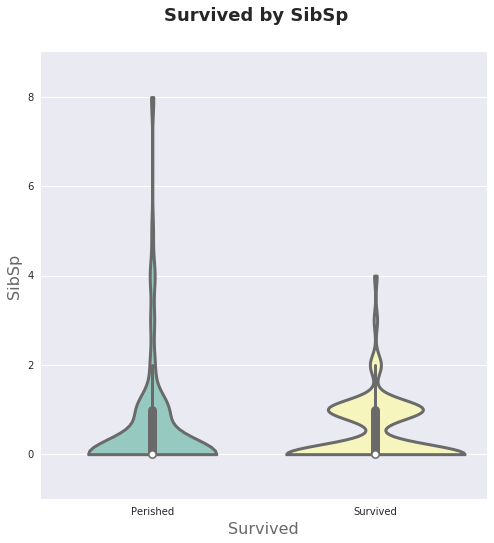

In [11]:
plot_violin(titanic_df,'Survived','SibSp')


### Survived by Siblings / Spouses aboard
1. For the non survivor group, a high majority of passengers have 0 siblings or spouses aboard.
1. For the survivor group, the highest majority are also for those passengers with 0 siblings or spouses aboard.
    1. We can also see that those passengers with 1 siblings or spouses aboard seems to have a higher survival rate as well.
    1. Hence perhaps we could do further analysis to see if this somehow indirectly affected their survival rate 

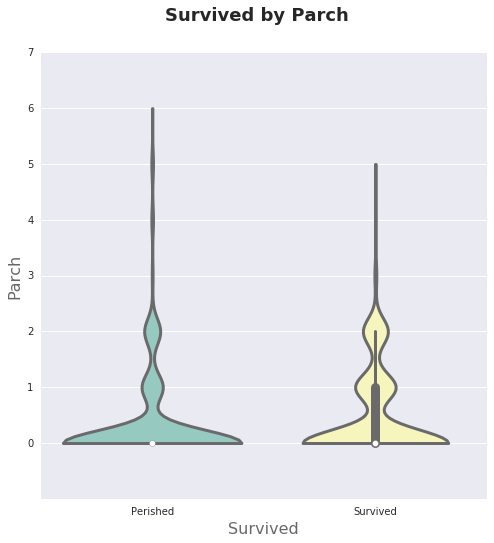

In [12]:
plot_violin(titanic_df,'Survived','Parch')

### Survived by Parents / Childrens aboard
1. For both groups, the pattern appears to be rather similar with the highest number of passengers in both the survivor and non survivor group with zero parents or children aboard.
1. The survivor group has a wider distribution of passengers with one parents or child aboard.
1. The survivor group only shows a fatter distribution of passengers with two parents or child aboard.
1. This could be an interesting angle to check at if it does affect the survival rate of the passengers, so we'll include this in for analysis on the next part as well.

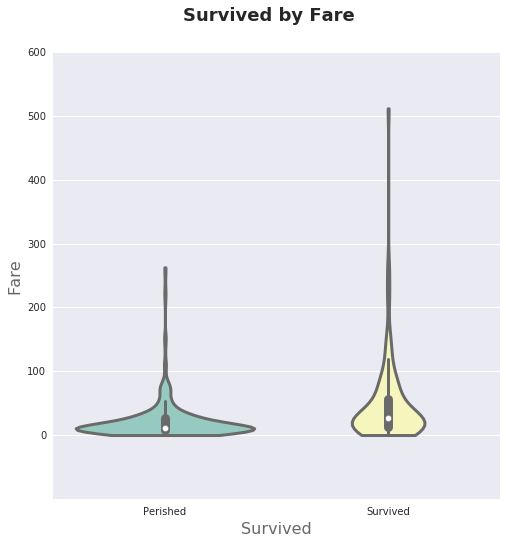

In [13]:
plot_violin(titanic_df,'Survived','Fare')

### Survived by Fare
1. Looking at the distributions of the passengers by fare, we can see that a very high number of passengers that didn't survived paid less than 50 dollars.
    1. There is also a thin tail heading upwards to fares slightly lesser than 300 dollars.
1. While the survivor groups also have a majority in the less than 50 dollars fare paid and have an extremely long tail towards 500 dollars fare range.
1. This is because the fares under fifty dollars are the majority as can be seen in the earlier bar plot.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplot(x, y, hue, df):
    title = x + " by " + y + " according to " + hue
    ax = sns.barplot(x=x, y=y, hue=hue, data=df);
    ax.set_title(title);

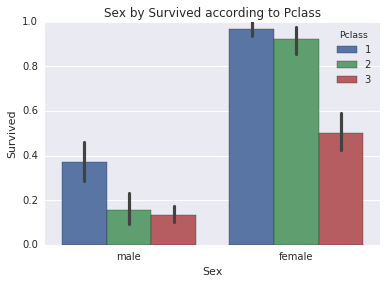

In [15]:
plot_barplot("Sex", "Survived", "Pclass", titanic_df)

### Sex by Survived according to Ticket Class
1. The plot shows a big contrast in survival rate between the male and female groups.
1. The order of the survival also seems to be in accordance with the ticket class, where the chance of survival goes down from first class to the third class.
1. This could probably be explained via the order of each passenger are evacuated via their ticket class.

### Interim Summary
1. Based on the analysis above, it would appear that the most optimal passenger group that has the highest survival rate would be within the age range of 30, first class and a female person.
1. It would appear that it's worth exploring the two additional factors of number of siblings or spouses aboard and number of parents or children aboard as well.

Let's dive deeper to get a closer understanding of the probabilities.

### Limitation
1. As we're not doing any statistical test to prove any direct correlation, the reasons given are just assumptions.

In [18]:
def plot_stats_count(attributes, rotate=0):
    survival_tag = 'Survived'
    attr_list = []
    
    # check the parameter passed contains multiple values as this needs to be appended differently
    if isinstance(attributes, str):
        attr_list.append(attributes)
        xtitle = "Survival by " + attributes
    else:
        attr_list.extend(attributes)
        xtitle = "Survival by " + ','.join(attributes)
    attr_list.append(survival_tag)
    
    # group by the needed parameter and count no of rows and later the percentage by each sub group
    survivor_by_attr = titanic_df.groupby(attr_list)[survival_tag].agg({'Survival Count':'count'})
    
    survivor_by_attr_formatted = survivor_by_attr.unstack()
    display(survivor_by_attr_formatted)
    
    # Create a simple bar plot to show the stats
    
    ax = survivor_by_attr_formatted.plot(kind='bar', title = xtitle, figsize=(10, 5), legend=True, fontsize=12, rot=rotate,
                           color=['#ff4d4d', '#1aa3ff'])
    ax.set_ylabel("Survival count", fontsize=12)
    ax.plot()
    
    return survivor_by_attr

def plot_stats_percentage(attributes, survivor_by_attr, rotate=0):
    survivor_pcts = survivor_by_attr.groupby(level=0).apply(lambda x: 
                                                            100*x / float(x.sum())).unstack()['Survival Count']     
    display(survivor_pcts)
   
    # Create a simple bar plot to show the stats
    if isinstance(attributes, str):
        xtitle = "Survival by " + attributes
    else:
        xtitle = "Survival by " + ','.join(attributes)
    
    ax = survivor_pcts.plot(kind='bar', title = xtitle, figsize=(10, 5), legend=True, fontsize=12, rot=rotate,
                           color=['#ff4d4d', '#1aa3ff'])
    ax.set_ylabel("Survival %", fontsize=12)
    ax.plot()
    
    return survivor_pcts

Survival Count       
Survived              0      1
Parch                         
0                 445.0  233.0
1                  53.0   65.0
2                  40.0   40.0
3                   2.0    3.0
4                   4.0    NaN
5                   4.0    1.0
6                   1.0    NaN

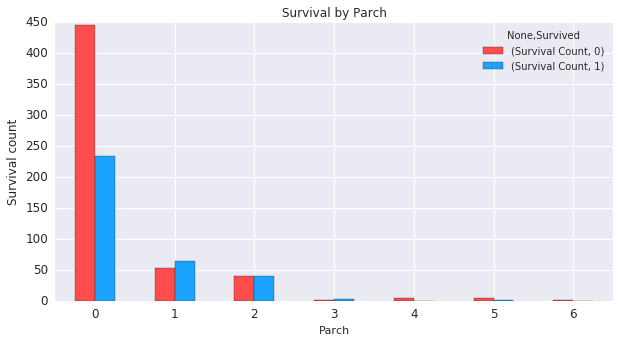

In [19]:
survivor_by_attr = plot_stats_count('Parch')

Survived,0,1
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,NaN
5,80.000000,20.000000
6,100.000000,NaN


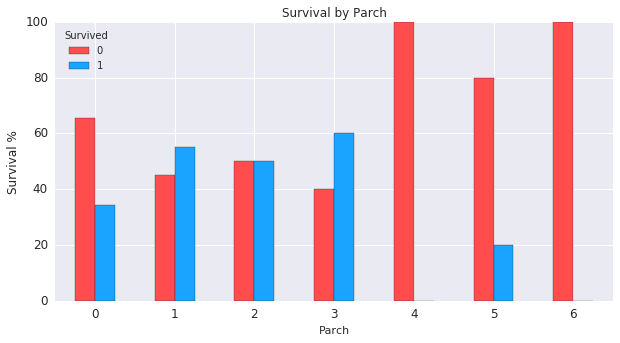

In [20]:
survivor_by_attAr_pct = plot_stats_percentage('Parch', survivor_by_attr)

### Survival by Parents / Children Aboard
1. Passengers with three parents or child onboard appears to have the highest survival rate at 60%.
2. This is followed by passengers with one child / parents aboard, 55% and passengers group with two parents or children aboard at 50 percents. 

Survival Count       
Survived              0      1
SibSp                         
0                 398.0  210.0
1                  97.0  112.0
2                  15.0   13.0
3                  12.0    4.0
4                  15.0    3.0
5                   5.0    NaN
8                   7.0    NaN

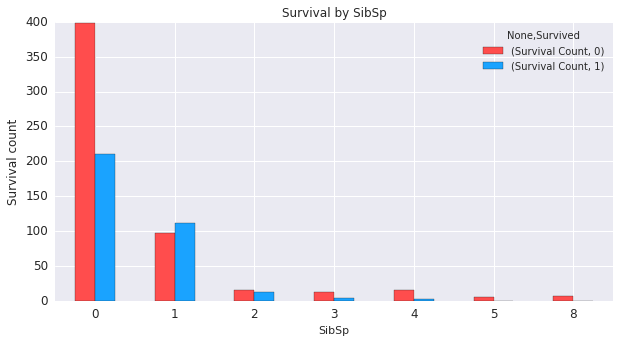

In [19]:
survivor_by_attr = plot_stats_count('SibSp')

Survived,0,1
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,NaN
8,100.000000,NaN


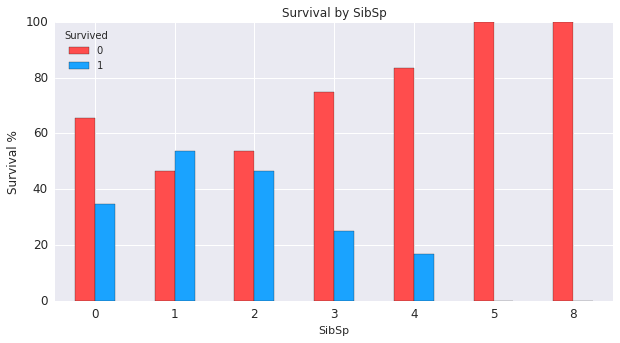

In [20]:
survivor_by_attAr_pct = plot_stats_percentage('SibSp', survivor_by_attr)

### Survival by Siblings or Spouses Aboard
1. Passengers with one sibling or spouse aboard have the highest survival rate at 53.59%.
2. This is followed by passengers with those with two siblings or spouses aboard at 46,43% and passengers group with zero sibling or spouse aboard at 34.54 percents. 

Survival Count     
Survived              0    1
Pclass                      
1                    80  136
2                    97   87
3                   372  119

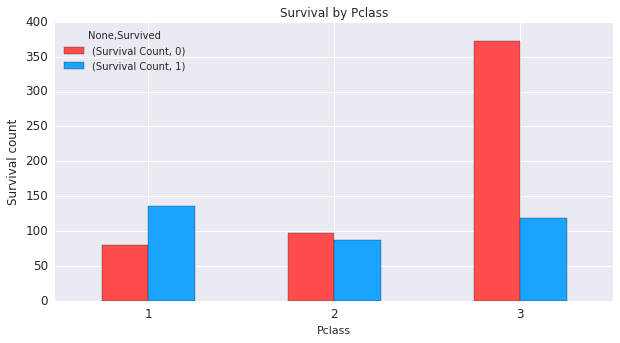

In [21]:
survivor_by_attr = plot_stats_count('Pclass')

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


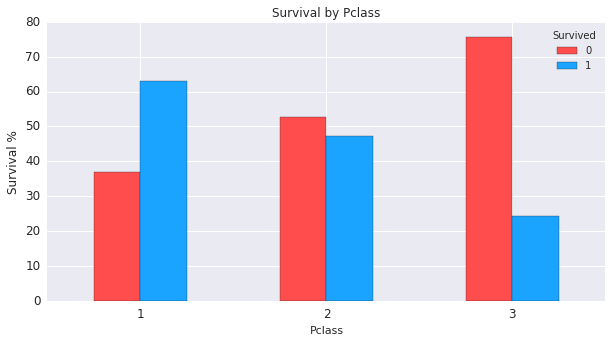

In [22]:
survivor_by_attAr_pct = plot_stats_percentage('Pclass', survivor_by_attr)

### Survival by Ticket Class
1. Passengers in the first class has the highest survival rate of 62.96% against death rate of 37.03%.
2. Passengers in the second class has an almost equal survival rate of 52.71% surviving vs 47.28% of not surviving.
3. The chances of surviving in the third class is less than a quarter, 24.24% of the non surviving percentage, 75.76%.

Survival Count     
Survived              0    1
Sex                         
female               81  233
male                468  109

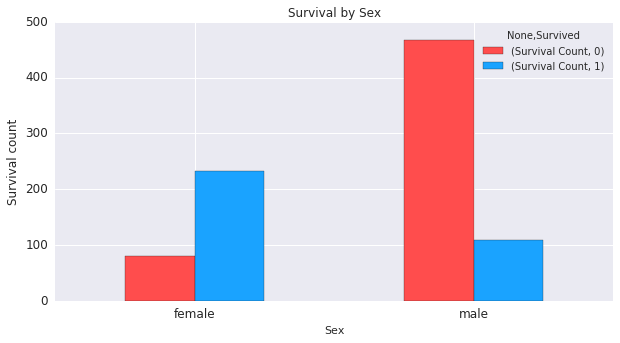

In [18]:
survivor_by_attr = plot_stats_count('Sex')

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


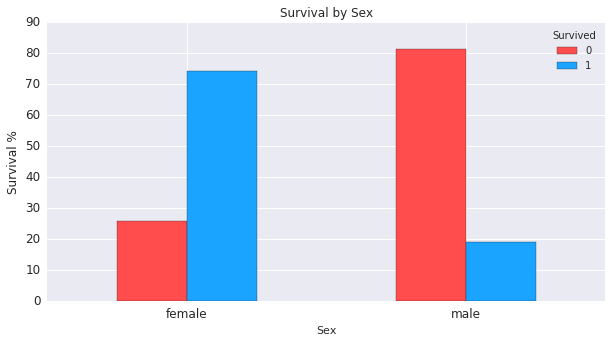

In [19]:
survivor_by_attr_pct = plot_stats_percentage('Sex', survivor_by_attr)

### Survival according to gender
1. Female passengers have the highest rate of survival 74.2% against death rate of 25.8%
1. Chances of the survival for a female passenger is almost 3 times the chances of not surviving.
1. For a male passenger however the chances of survival is rather slim at 18.9% against 81.11%

Survival Count     
Survived              0    1
IsAdult                     
False                69   70
True                480  272

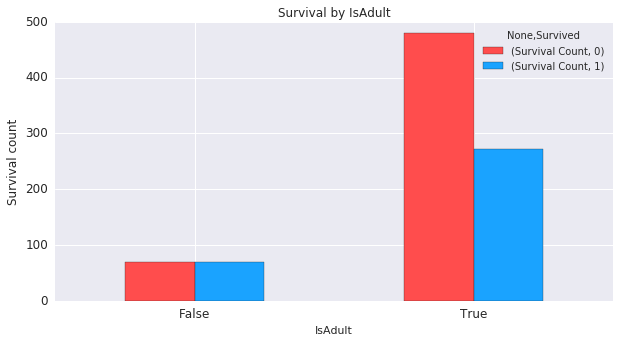

In [20]:
survivor_by_attr = plot_stats_count('IsAdult')

Survived,0,1
IsAdult,,
False,49.640288,50.359712
True,63.829787,36.170213


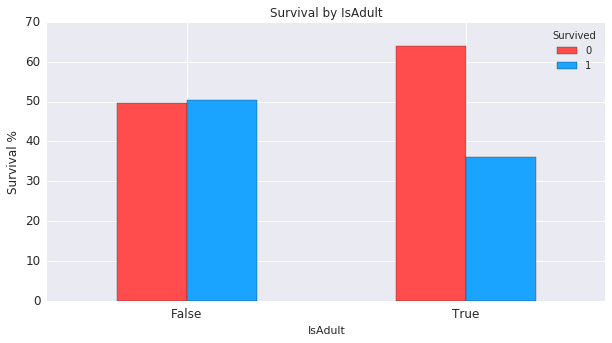

In [21]:
survivor_by_attr_pct = plot_stats_percentage('IsAdult', survivor_by_attr)

### Survival according to age
1. A child has a slightly higher survival rate of 50.36% against the death rate of 49.64%. 
    1. However this data might be a little off due to the NaN data which was replaced with the mean value of this sample data set.
1. The chances of survival for an adult is 36.17% as compared to non surviving at 63.83%.

### Subsequent finding
1. Female passengers have a higher chances of survival at 74.2%
1. First class passengers has the highest chances of survival with 62.96%
1. Passengers with three parents or child onboard have the highest survival rate at 60%.
1. Passengers with one sibling or spouse aboard have the highest survival rate at 53.59%.
1. Children have a slight edge in survival rate with 50.36% of surviving.

### Next
1. Let's check on combination of the factors to compare the top three factors given above, and see which combination have the highest survival rate.

Survival Count    
Survived                   0   1
Sex    Pclass                   
female 1                   3  91
       2                   6  70
       3                  72  72
male   1                  77  45
       2                  91  17
       3                 300  47

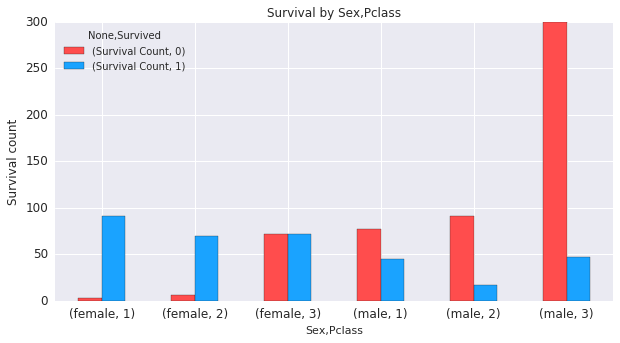

In [21]:
factors1 = ['Sex','Pclass']
survivor_by_attr = plot_stats_count(factors1)

Survived               0          1
Sex    Pclass                      
female 1        0.955414  28.980892
       2        1.910828  22.292994
       3       22.929936  22.929936
male   1       13.344887   7.798960
       2       15.771231   2.946274
       3       51.993068   8.145581

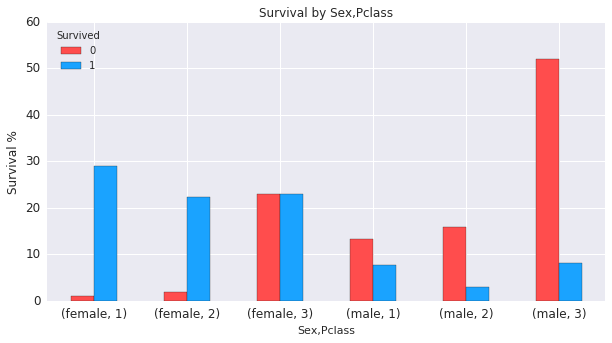

In [22]:
survivor_by_attr_pct = plot_stats_percentage(factors1, survivor_by_attr)

### Survival according to gender and ticket class
1. A female in the first class has the highest chance of surviving with 29% out of the group of survivors.
1. A female in second and third class has the second highest chance of surviving with 22.29% and 22.93% respectively out of the whole survivor group.
1. A female passenger in the third class has an almost 50/50 chance of surviving.
1. A male passenger in the third class has the lowest chances of survival with a high mortality rate of 52% more than half of all the non surviving passenger group.
1. The survival rate for a male passenger in the first class and the third class is close enough (7.8% vs 8.15%), however comparing the non survival rate then we can see a huge discrepancies of 13.34% vs 52% of death for first class against third class.

Survival Count       
Survived                  0      1
Sex    Parch                      
female 0               41.0  153.0
       1               14.0   46.0
       2               19.0   30.0
       3                1.0    3.0
       4                2.0    NaN
       5                3.0    1.0
       6                1.0    NaN
male   0              404.0   80.0
       1               39.0   19.0
       2               21.0   10.0
       3                1.0    NaN
       4                2.0    NaN
       5                1.0    NaN

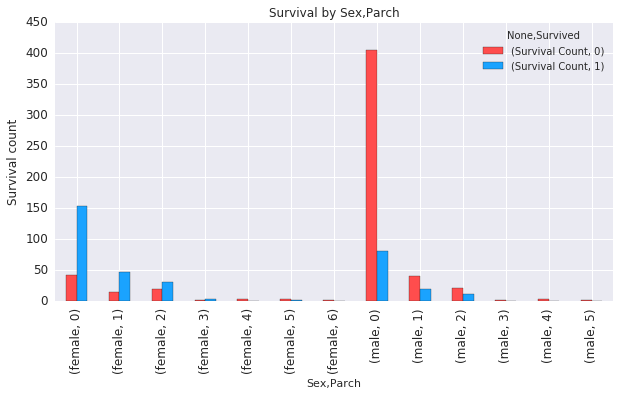

In [23]:
factors2 = ['Sex','Parch']
survivor_by_attr = plot_stats_count(factors2, 90)

Survived              0          1
Sex    Parch                      
female 0      13.057325  48.726115
       1       4.458599  14.649682
       2       6.050955   9.554140
       3       0.318471   0.955414
       4       0.636943        NaN
       5       0.955414   0.318471
       6       0.318471        NaN
male   0      70.017331  13.864818
       1       6.759099   3.292894
       2       3.639515   1.733102
       3       0.173310        NaN
       4       0.346620        NaN
       5       0.173310        NaN

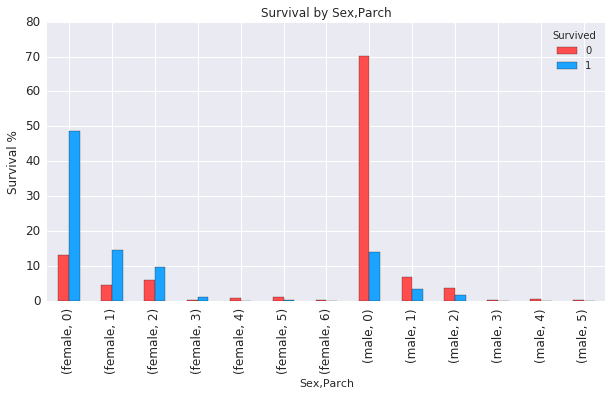

In [24]:
survivor_by_attr_pct = plot_stats_percentage(factors2, survivor_by_attr, 90)

### Survival by Gender, Number of Parent or Children aboard
1. It would appears that a female with 0 parent or child aboard have the highest chance of survival with 48.72%
1. This is followed by female with one parent or child aboard at 14.65%. 
1. Next, we see that a male passenger with zero parent or child aboard has a 13.86% of survival.
1. The mortality rate is the highest for the male group with zero parent or children aboard which is at 70%.

Survival Count      
Survived                  0     1
Pclass Parch                     
1      0               64.0  99.0
       1               10.0  21.0
       2                5.0  16.0
       4                1.0   NaN
2      0               86.0  48.0
       1                8.0  24.0
       2                3.0  13.0
       3                NaN   2.0
3      0              295.0  86.0
       1               35.0  20.0
       2               32.0  11.0
       3                2.0   1.0
       4                3.0   NaN
       5                4.0   1.0
       6                1.0   NaN

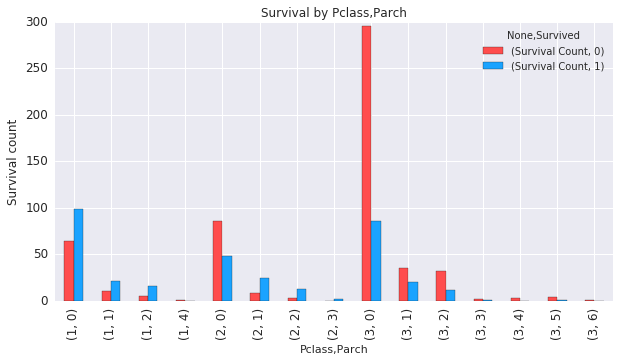

In [25]:
factors3 = ['Pclass','Parch']
survivor_by_attr = plot_stats_count(factors3, 90)

Survived              0          1
Pclass Parch                      
1      0      29.629630  45.833333
       1       4.629630   9.722222
       2       2.314815   7.407407
       4       0.462963        NaN
2      0      46.739130  26.086957
       1       4.347826  13.043478
       2       1.630435   7.065217
       3            NaN   1.086957
3      0      60.081466  17.515275
       1       7.128310   4.073320
       2       6.517312   2.240326
       3       0.407332   0.203666
       4       0.610998        NaN
       5       0.814664   0.203666
       6       0.203666        NaN

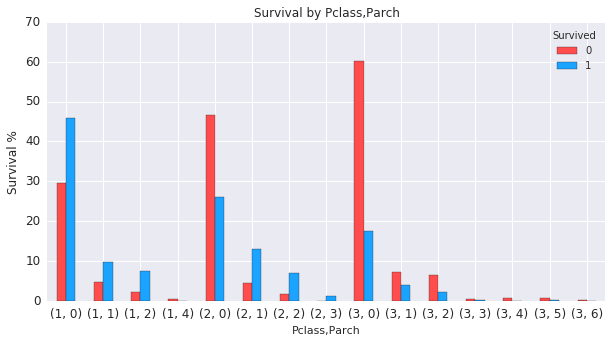

In [26]:
survivor_by_attr_pct = plot_stats_percentage(factors3, survivor_by_attr)

### Survival by Ticket Class, Number of Parent or Children aboard
1. A first class ticket passenger with zero parent or child aboard has the highest survival rate at 45.83% out of the survival group.
1. This is followed by a second class ticket passenger with zero parent or child aboard at 26.09%.
1. The non survival rate is the highest for a third class ticket passenger with zero parent or child aboard against the survival rate of passenger in this group at 17.51%

In [ ]:
factors4 = ['Sex','IsAdult']
survivor_by_attr = plot_stats_count(factors3)

### Survival by Ticket Class, Number of Parent or Children aboard
1. A first class passenger with zero parent or child aboard shows high chances of surviving with 45.83% out of the group of survivors.
1. A third class passenger with zero parent or child aboard has the lowest chance of surviving with percentage occupying 60.08% out of the non survivors group.


### This round's Finding
1. Based on this round of analysis, being a female adult with a first class ticket and zero parent or children aboard shows clear advantage of surviving.
1. In the next and final step, we're going to do a three factors analysis to check the same survival rate again.
1. Since the additional factors introduced, the number of parents and child aboard didn't seems to show any positive correlation when the passengers have three or more parents and child aboard, we want to reanalyse the Adult or Children factor as well as the number of siblings or spouses aboard.

### Limitation
1. Percentage comparison is done on the group against the whole of the survivor group or against the whole of the none survivor group. 
    1. Hence the smaller count in the group could have skewed the percentage. So the idea here is just to do a simple comparison based on the survival percentage out of the survivor / none survivor group as whole.
1. Due to the limited analysis of the possible factors given, the best survival group percentage is assumed based on this restriction.


Survival Count      
Survived                         0     1
Sex    Pclass Parch                     
female 1      0                1.0  63.0
              1                NaN  17.0
              2                2.0  11.0
       2      0                5.0  40.0
              1                1.0  17.0
              2                NaN  11.0
              3                NaN   2.0
       3      0               35.0  50.0
              1               13.0  12.0
              2               17.0   8.0
              3                1.0   1.0
              4                2.0   NaN
              5                3.0   1.0
              6                1.0   NaN
male   1      0               63.0  36.0
              1               10.0   4.0
              2                3.0   5.0
              4                1.0   NaN
       2      0               81.0   8.0
              1                7.0   7.0
              2                3.0   2.0
       3      0              260.0  36.0
              1               22.0   8.0
              2               15.0   3.0
              3                1.0   NaN
              4                1.0   NaN
              5                1.0   NaN

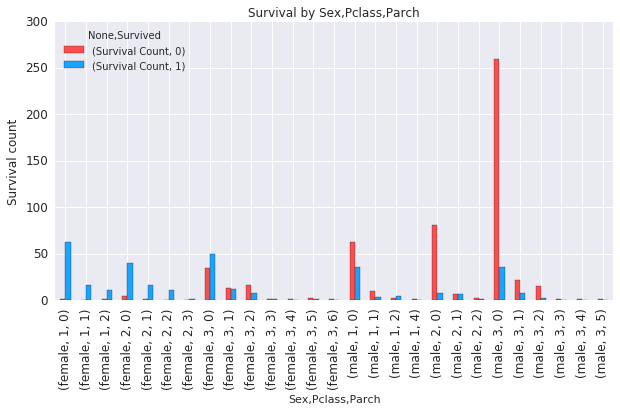

In [31]:
factors4 = ['Sex','Pclass','Parch']
survivor_by_attr = plot_stats_count(factors4, 90)

Survived                     0          1
Sex    Pclass Parch                      
female 1      0       0.318471  20.063694
              1            NaN   5.414013
              2       0.636943   3.503185
       2      0       1.592357  12.738854
              1       0.318471   5.414013
              2            NaN   3.503185
              3            NaN   0.636943
       3      0      11.146497  15.923567
              1       4.140127   3.821656
              2       5.414013   2.547771
              3       0.318471   0.318471
              4       0.636943        NaN
              5       0.955414   0.318471
              6       0.318471        NaN
male   1      0      10.918544   6.239168
              1       1.733102   0.693241
              2       0.519931   0.866551
              4       0.173310        NaN
       2      0      14.038128   1.386482
              1       1.213172   1.213172
              2       0.519931   0.346620
       3      0      45.060659   6.239168
              1       3.812825   1.386482
              2       2.599653   0.519931
              3       0.173310        NaN
              4       0.173310        NaN
              5       0.173310        NaN

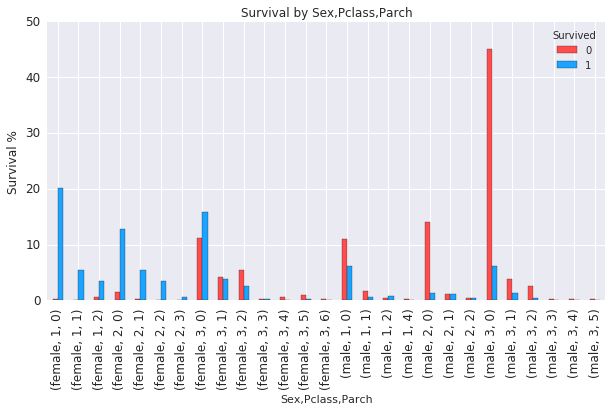

In [32]:
survivor_by_attr_pct = plot_stats_percentage(factors4, survivor_by_attr, 90)

### Survival by Gender, Ticket Class and Number of Parent or Child aboard
1. The best survival rate in this group is from the female first class ticket with zero parent or child aboard with 20.06% survival rate and 0.31% perished rate.
1. The worst group is from the male third class ticket holder with zero parent or child aboard group with 45.06% non survival rate and 6.24% survival rate.

Survival Count      
Survived                           0     1
Sex    Pclass IsAdult                     
female 1      False              1.0  10.0
              True               2.0  81.0
       2      False              NaN  14.0
              True               6.0  56.0
       3      False             21.0  22.0
              True              51.0  50.0
male   1      False              1.0   4.0
              True              76.0  41.0
       2      False              6.0   9.0
              True              85.0   8.0
       3      False             40.0  11.0
              True             260.0  36.0

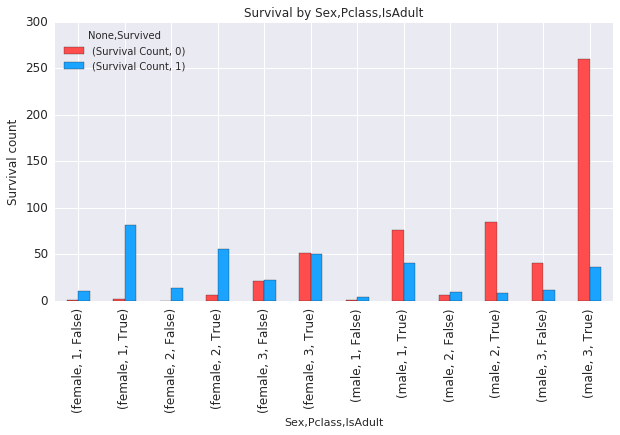

In [33]:
factors5 = ['Sex','Pclass','IsAdult']
survivor_by_attr = plot_stats_count(factors5, 90)

Survived                       0          1
Sex    Pclass IsAdult                      
female 1      False     0.318471   3.184713
              True      0.636943  25.796178
       2      False          NaN   4.458599
              True      1.910828  17.834395
       3      False     6.687898   7.006369
              True     16.242038  15.923567
male   1      False     0.173310   0.693241
              True     13.171577   7.105719
       2      False     1.039861   1.559792
              True     14.731369   1.386482
       3      False     6.932409   1.906412
              True     45.060659   6.239168

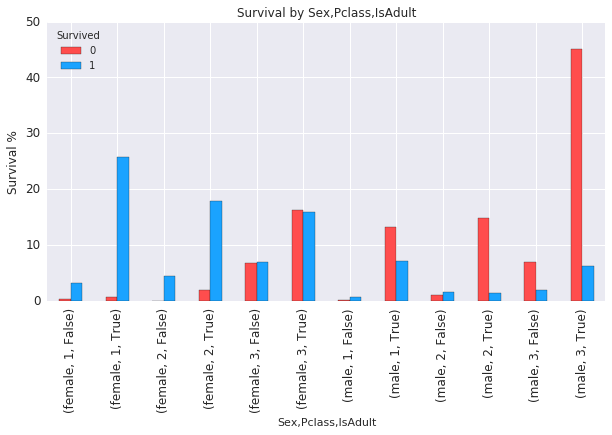

In [34]:
survivor_by_attr_pct = plot_stats_percentage(factors5, survivor_by_attr, 90)

### Survival by Gender, Ticket Class and Is Adult or Child
1. The best survival rate in this group is from the female first class ticket adult passenger with 25.8% survival rate and 0.64% perished rate.
1. The worst survival rate group is from the third class ticket adult passenger with a perished rate of 45.06% and survival rate of 6.24%
    1. This coincidentally is the exact same number as the group for third class male passenger with zero parent or child aboard.

Survival Count      
Survived                         0     1
Sex    Pclass SibSp                     
female 1      0                1.0  48.0
              1                2.0  38.0
              2                NaN   3.0
              3                NaN   2.0
       2      0                3.0  41.0
              1                3.0  25.0
              2                NaN   3.0
              3                NaN   1.0
       3      0               33.0  48.0
              1               21.0  17.0
              2                3.0   4.0
              3                7.0   1.0
              4                4.0   2.0
              5                1.0   NaN
              8                3.0   NaN
male   1      0               59.0  29.0
              1               16.0  15.0
              2                1.0   1.0
              3                1.0   NaN
       2      0               67.0   9.0
              1               20.0   7.0
              2                4.0   1.0
       3      0              235.0  35.0
              1               35.0  10.0
              2                7.0   1.0
              3                4.0   NaN
              4               11.0   1.0
              5                4.0   NaN
              8                4.0   NaN

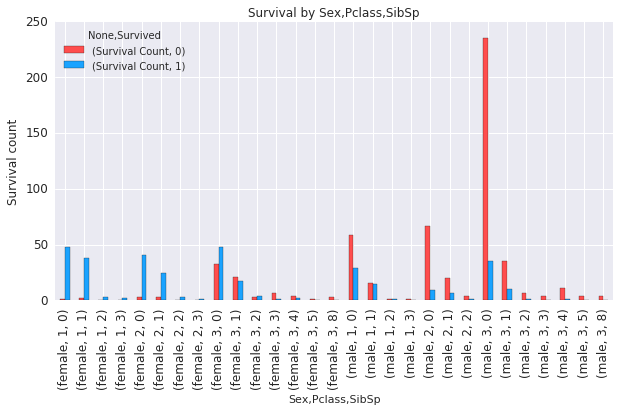

In [36]:
factors6 = ['Sex','Pclass','SibSp']
survivor_by_attr = plot_stats_count(factors6, 90)

Survived                     0          1
Sex    Pclass SibSp                      
female 1      0       0.318471  15.286624
              1       0.636943  12.101911
              2            NaN   0.955414
              3            NaN   0.636943
       2      0       0.955414  13.057325
              1       0.955414   7.961783
              2            NaN   0.955414
              3            NaN   0.318471
       3      0      10.509554  15.286624
              1       6.687898   5.414013
              2       0.955414   1.273885
              3       2.229299   0.318471
              4       1.273885   0.636943
              5       0.318471        NaN
              8       0.955414        NaN
male   1      0      10.225303   5.025997
              1       2.772964   2.599653
              2       0.173310   0.173310
              3       0.173310        NaN
       2      0      11.611785   1.559792
              1       3.466205   1.213172
              2       0.693241   0.173310
       3      0      40.727903   6.065858
              1       6.065858   1.733102
              2       1.213172   0.173310
              3       0.693241        NaN
              4       1.906412   0.173310
              5       0.693241        NaN
              8       0.693241        NaN

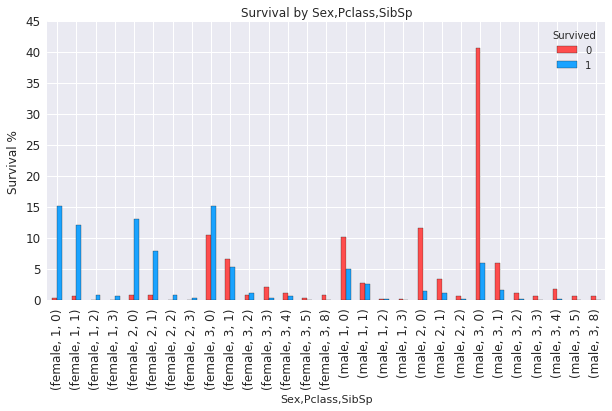

In [37]:
survivor_by_attr_pct = plot_stats_percentage(factors6, survivor_by_attr, 90)

### Survival by Gender, Ticket Class and Number of Sibling or Spouse aboard
1. The best survival rate in this group is from the female first class ticket passenger with zero sibling or spouse aboard with 15.29% survival rate and 0.32% perished rate.
    1. The third class ticket female group with zero sibling or spouse aboard also share the same survival rate but has a higher perished rate at 10.51%
1. The worst survival rate is the third class ticket male passenger with zero sibling or spouse aboard at 40.73% perished rate and a measly 6.07% survival rate.

### Survival rate to Perished Rate comparison
1. Survival by Gender, Ticket Class and Number of Parent or Child aboard
    1. The female first class ticket with zero parent or child aboard with 20.06% survival rate to 0.31% perished rate.
1. Survival by Gender, Ticket Class and Is Adult or Child
    1. female first class ticket adult passenger with 25.8% survival rate to 0.64% perished rate.
1. Survival by Gender, Ticket Class and Number of Sibling or Spouse aboard
    1. The female first class ticket passenger with zero sibling or spouse aboard with 15.29% survival rate to 0.32% perished rate.

In [29]:
pct_surviving_ParCh = 20.06/.31 * 100
print pct_surviving_ParCh

pct_surviving_isAdult = 25.8/.64 * 100
print pct_surviving_isAdult

pct_surviving_SibSp = 15.29/.32 * 100
print pct_surviving_SibSp

6470.96774194
4031.25
4778.125


### Conclusion
1. As we have earlier concluded that the female first class ticket passenger has the highest survival rate against the rest of the group, we are just checking through the other possible factors for an additinal edge in the survival rate.
1. So holding the gender and ticket class variables as a constant factor and comparing number of parent or child aboard, is an adult or child and number of spouse or sibling aboard, the additional factor that would has the highest survival rate would be the is adult or child group.

So if the group with the highest chance of survival based on the analysis of the three factors of is number of parent or child aboard, gender and ticket class would be the female first class ticket holder with zero parent or child aboard group that has a 64.71 times more likely to survive than perished probability.